**Author:**
Jean Paul Azzopardi

**Dates:**
March - November 2023

# **Instructions:**

The cells below contain code that connects to the MassCourt MySQL database.

The tables should be visible as is. If not, navigate to 'Runtime' above and press 'Run all.'

The notebook will execute accordingly - **it will take some time (~5 to 10 minutes)**. After the intial run, the data will be cached so it won't take as long to load again.

Once done, you will be able to see interactive tables (if not available click the magic wand next to the table and it will make it interactive). Please note the tables are limited to 200,000 rows, even though queries may intend to return more. You can filter and order as you would in an Excel file.



In [2]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 821.8 kB/s eta 0:00:00


In [3]:
import pymysql
import pandas as pd
import numpy as np
from google.colab import data_table

In [4]:
data_table.enable_dataframe_formatter()

In [33]:
#Connect to MySQL database

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='wp_courtdocs')


cursor = cnx.cursor()
# more info here: https://docs.google.com/document/d/1aZKF0X7HjcXUYurD8uQYDpgo9wQdeJH4CMviBJeTYVc/edit#

In [37]:
# query for count of judges


query =  """
SELECT
          *
      FROM
           cdocs_case_action_index
      WHERE

          description like '%wage%garnish%'
          or description like '%Wage%Garnish%'
          or description like '%Wage%garnish%'
          or description like '%wage%Garnish%'







"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.72 µs


# **TABLE 1: COUNT OF TOTAL CASES PER JUDGE**

In [38]:
judge_df = pd.DataFrame(results)
j=judge_df.rename({0:'Name', 1:'Count',2:'pl'}, axis = 1)

0.08977189109639441


([<matplotlib.patches.Wedge at 0x7eb38effb3d0>,
 [Text(1.056542710139344, 0.30613314366695127, 'Defendant'),
  Text(-1.0565426886426514, -0.306133217857451, 'Other Wage Garnish Cases')])

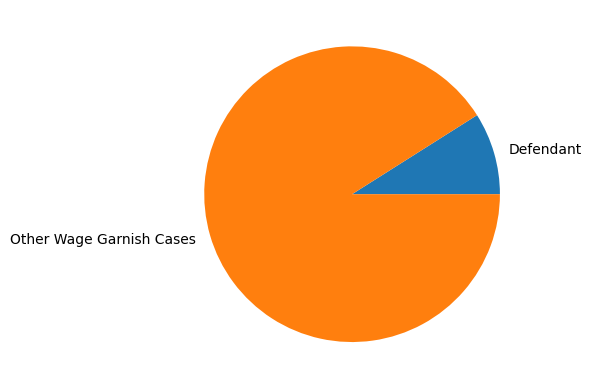

In [39]:
import matplotlib.pyplot as plt
a1=j.loc[j['pl'] == 'Defendant']
k=(len(a1)/len(j))
print(k)
labels = 'Defendant', 'Other Wage Garnish Cases'
sizes = [len(a1), len(j)-len(a1)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [42]:
query =  """
SELECT
          *
      FROM
           cdocs_case_action_index
      WHERE

          description like '%capia%warrant%'
          or description like '%Capia%Warrant%'
          or description like '%Capia%warrant%'
          or description like '%capia%Warrant%'






"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.48 µs


0.06070287539936102


([<matplotlib.patches.Wedge at 0x7eb3877740a0>,
 [Text(1.0800581997302559, 0.20850488050748178, 'Defendant'),
  Text(-1.0800581899694366, -0.20850493106865475, 'Other Capia Warranty Cases')])

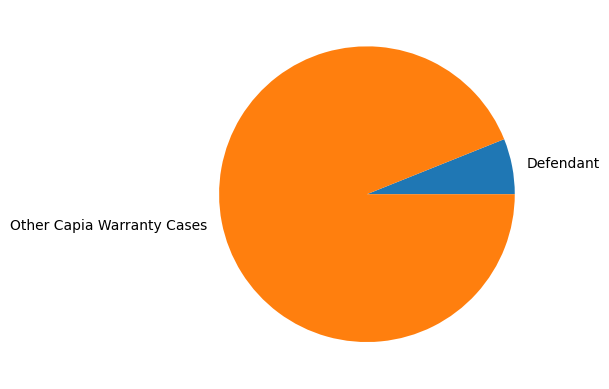

In [43]:
judge_df2 = pd.DataFrame(results)
j2=judge_df2.rename({0:'Name', 1:'Count',2:'pl'}, axis = 1)
a1=j2.loc[j2['pl'] == 'Defendant']
k=(len(a1)/len(j2))
print(k)
labels = 'Defendant', 'Other Capia Warranty Cases'
sizes = [len(a1), len(j2)-len(a1)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)

In [ ]:
judge_df.to_csv("./X_test.csv", index=False)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Set the maximum sequence length
SEQ_LEN = 128
X_train = pd.read_csv("./X_test.csv")
X = X_train['4'][:100]
y = [0 if ('stop' in label or 'terminat' in label) else 1 for label in X_train['4'][:100]]
# Tokenize and encode your data
input_ids = []
attention_masks = []
labels = []
y = np.array(y)
for text, label in zip(X, y):
    encoded_dict = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=SEQ_LEN,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])
    labels.append(label)

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

# Fine-tune the model
optimizer = AdamW(model.parameters(), lr=2e-5)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In t

8/15/11 Motion to stop wage garnishment filed by D01  FERNANDO A. OTALVARO.


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Tokenize and encode your data
train_encodings = tokenizer.batch_encode_plus(
    X_train,
    add_special_tokens=True,
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors='pt',
    return_attention_mask=True,
    return_token_type_ids=False
)
val_encodings = tokenizer.batch_encode_plus(
    X_val,
    add_special_tokens=True,
    truncation=True,
    padding=True,
    max_length=64,
    return_tensors='pt',
    return_attention_mask=True,
    return_token_type_ids=False
)
# Create PyTorch DataLoader
train_dataset = torch.utils.data.TensorDataset(train_encodings['input_ids'], train_encodings['attention_mask'], torch.tensor(y_train))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)

for epoch in range(3):  # Adjust as needed
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids, attention_mask, labels = batch
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

In [ ]:
torch.save(model, 'bert_model.pth')

In [ ]:
X_train = pd.read_csv("./X_test.csv")
X=X_train['4']
X=X.to_list()
print(X)
print(len(X))


['8/15/11 Motion to stop wage garnishment filed by D01  FERNANDO A. OTALVARO.', '9/1/11 Motion to reduce wage attachment allowed ...garnishment reduced to $100.00 per month effective 9/1/11.  ( Mason, Hon. Mark D ).', 'Misc Entry:exon ret to cred atty of record to start a wage garnishment process case remains open', 'Misc Entry: Affidavit in support of Wage Garnishment', "Misc Entry:\n\n\n\nCorrespondence from Deft's employment regarding wage garnishment", 'Motion to reconsider wage garnishment by agreemt allowed ( Jennings III, Hon. Joseph W. ).', "Plaintiff's Opposition to the defendant's motion to vacate the wage garnishment.", 'Default entered against [Party] at the call of the list (Mass.R.Civ.P. 77(b)). -- Plaintiff\'s attorney states that they will not be going forward on default as this case is a "suit of judgment" for wage garnishment.', 'Motion  to vacate wage garnishment filed by Derek P Briggs.', "Motion  to vacate wage garnishment allowed Hon. Daniel J O'Shea", "Motion  Pl

In [ ]:
encoded_inputs = tokenizer(X, truncation=True, padding=True, max_length=64, return_tensors='pt', return_attention_mask=True)


{'input_ids': tensor([[  101,  1022,  1013,  ...,     0,     0,     0],
        [  101,  1023,  1013,  ...,     0,     0,     0],
        [  101, 28616,  2278,  ...,     0,     0,     0],
        ...,
        [  101,  4367,  2005,  ...,     0,     0,     0],
        [  101, 12087,  2005,  ...,     0,     0,     0],
        [  101,  4367,  2005,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}


In [ ]:
with torch.no_grad():
    logits = model(encoded_inputs['input_ids'], attention_mask=encoded_inputs['attention_mask'])
    probabilities = torch.softmax(logits.logits, dim=1)
# Thresholding (example: 0.5)


In [ ]:
threshold = 0.03
predicted_labels = [1 if prob[0] > threshold-0.2 else 0 for prob in probabilities]



([<matplotlib.patches.Wedge at 0x796c93cad150>,
 [Text(6.735557395310444e-17, 1.1, 'Wage_Garnish'),
  Text(-2.0206672185931328e-16, -1.1, 'Total')])

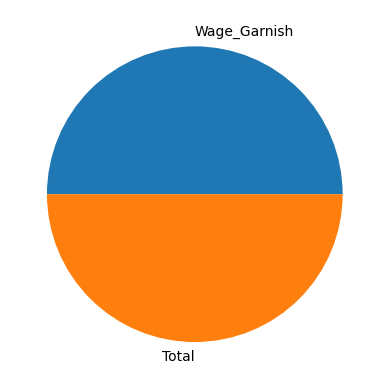

In [ ]:
import matplotlib.pyplot as plt

labels = 'Wage_Garnish', 'Total'
sizes = [sum(predicted_labels), len(predicted_labels)]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)


In [ ]:
# query for attorney counts

query =  """
          *
      FROM
          cdocs_case_action_index


"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


ProgrammingError: (1064, "You have an error in your SQL syntax; check the manual that corresponds to your MySQL server version for the right syntax to use near '*\n      FROM\n          cdocs_case_action_index' at line 1")

# **TABLE 2: COUNT OF TOTAL CASES PER ATTORNEY**

In [ ]:
attorney_df1 = pd.DataFrame(results)
attorney_df1.rename({0:'Name', 1:'Count'}, axis = 1)

,Name,Count
0,Pro Se,555501
1,Pro Se (PROPER),397019
2,"Wilson, Kenneth C",167149
3,"Wiener, Stephen A.",136888
4,"Kreppel, Gary Howard",95213
...,...,...
95,"Cox, Aaron",3751
96,"Castleman, Harry",3709
97,"Forsyth, Maureen",3688
98,"Homoleski, Kristina L.",3602


# **TABLE 2.5: COUNT OF TOTAL CASES PER Pro Se and Pro Per**

In [ ]:
attorney_df = pd.DataFrame(results)
attorney_df2=attorney_df.rename({0:'Attorney', 1:'Count'}, axis = 1)

ps_pp=attorney_df2[attorney_df2['Attorney'].isin(['Pro Se', 'Pro Se (PROPER)'])]
ps_pp


,Attorney,Count
0,Pro Se,555234
1,Pro Se (PROPER),397019


In [ ]:

pro_se_count = attorney_df[attorney_df[0].isin(['Pro Se', 'Pro Se (PROPER)'])][1].sum()
print("Total count of 'Pro Se' and 'Pro Se (PROPER)':", pro_se_count)


Total count of 'Pro Se' and 'Pro Se (PROPER)': 952253


In [ ]:
# query for attorney counts


query =  """

SELECT
    party_name, COUNT(*) AS count
FROM
    cdocs_party_assignment_index
        JOIN
    cdocs_party_index ON cdocs_party_index.post_id = cdocs_party_assignment_index.party_id
GROUP BY party_name
order by count desc
limit 100;

"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.63 µs


# **TABLE 3: COUNT OF HOW MANY TIMES A PARTY WAS INVOLVED IN A CASE**

In [ ]:
parties_count = pd.DataFrame(results)
parties_count.rename({0:'Name', 1:'Count'}, axis = 1)

,Name,Count
0,"Portfolio Recovery Associates, Llc",115640
1,Midland Funding Llc,112353
2,Discover Bank,102358
3,"Capital One Bank (Usa), N.A.",92548
4,LVNV Funding LLC,81841
...,...,...
95,"Bac Home Loans Servicing, Lp",3869
96,North Star Capital Acquisition Llc,3869
97,Greylock Federal Credit Union,3857
98,"Doe, John",3850


In [ ]:
# query for court + parent court + case


query =  """

SELECT
    case_number,
    case_type,
    case_status,
    wp_terms.name AS court,
    t1.name AS court_department
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent

WHERE
    case_status like '%Open%'
LIMIT 100;
"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


ProgrammingError: Cursor closed

# **TABLE 4: CASES, CASE_TYPE, STATUS AND WHICH COURT AND DEPARTMENT THEY BELONG TO**

In [ ]:
courts = pd.DataFrame(results)

courts.rename({0: '', 1: 'Case_Type', 2: 'Case Status', 3: 'Court', 4:'Department'}, axis = 1)
courts[1].unique()


array(['Administrative Civil Actions', 'Torts', 'Real Property',
       'Contract / Business Cases', 'Housing Court Summary Process',
       'Housing Court Civil', 'Equitable Remedies',
       'Civil Actions with Incarcerated Party'], dtype=object)

In [ ]:
courts_test = pd.DataFrame(results).rename({0: 'Case Number', 1: 'Case_Type', 2: 'Case Status', 3: 'Court', 4:'Department'}, axis = 1)

courts_test

,Case Number,Case_Type,Case Status,Court,Department
0,1485CV00745,Administrative Civil Actions,Open,Worcester County,Superior Court
1,1485CV00756,Administrative Civil Actions,Open,Worcester County,Superior Court
2,1081CV00861,Torts,Open,Middlesex County,Superior Court
3,1485CV00737,Torts,Open,Worcester County,Superior Court
4,1081CV00862,Torts,Open,Middlesex County,Superior Court
...,...,...,...,...,...
95,13H79SP004702,Housing Court Summary Process,Reopened,Western,Housing Court
96,12H84SP003685,Housing Court Summary Process,Reopened,Boston,Housing Court
97,10H79SP000501,Housing Court Summary Process,Reopened,Western,Housing Court
98,13H79SP004826,Housing Court Summary Process,Reopened,Western,Housing Court


In [ ]:
# query for active cases per court


query =  """

SELECT
    court, COUNT(*) AS count
FROM
    (SELECT
        case_number,
            case_type,
            case_status,
            wp_terms.name AS court,
            t1.name AS court_department
    FROM
        cdocs_case_meta_index AS cdocs_meta
    JOIN wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
    JOIN wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
    JOIN wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent) tbl1
WHERE
    case_status LIKE '%active%'
GROUP BY court
ORDER BY count DESC;

"""
%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


# **TABLE 5: ACTIVE CASES PER COURT**

In [ ]:
active_cases_courts = pd.DataFrame(results)

active_cases_courts.rename({0: 'Courts', 1: 'Active Cases'}, axis = 1)

,Courts,Active Cases
0,Southeast,98187
1,Western,73674
2,Central,28314
3,Worcester,26428
4,Middlesex County,21650
5,Worcester County,18890
6,Essex County,18473
7,Boston,18293
8,Suffolk County,14513
9,Metro South,14433


In [ ]:
# caseload by judges


query =  """

SELECT post_title, case_type, count(*) as count from ( -- select judge, case type and judge count per case type  (can also add court and court department here)
SELECT
    case_number,
    case_type,
    case_status,
    wp_terms.name AS court,
    t1.name AS court_department,
    judge_1_id AS judge
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id -- joining court
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent -- joining parent court
WHERE
    case_status LIKE '%active%' -- selecting just active cases
        AND judge_1_id > 0) tbl1 -- that have a judge assigned to them
join wp_posts on wp_posts.ID = tbl1.judge -- joining subquery to judges
where tbl1.judge IN (select ID from wp_posts where post_type = 'Judge')
group by post_title, case_type with rollup; -- subtotal aggregate

"""
%time


cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


# **TABLE 6: CASELOAD PER JUDGE, SPLIT BY CASE_TYPE**

*Note: A blank cell in Case_Type represents the total count of cases per judge*

In [ ]:
judge_caseload = pd.DataFrame(results)

judge_caseload.rename({0: 'Judge', 1: 'Case_Type', 2: 'Count'}, axis = 1)

,Judge,Case_Type,Count
0,"Abber, Jeffrey",Change of Name Managed,1
1,"Abber, Jeffrey",Domestic Relations,14
2,"Abber, Jeffrey",Equity - Partition,6
3,"Abber, Jeffrey",Estates and Administration,467
4,"Abber, Jeffrey",Guardianship Managed,6
...,...,...,...
1294,"Wyner, Claudine T",Special Immigration Juvenile Status,14
1295,"Wyner, Claudine T",None,933
1296,"Yoyo, obo",Estates and Administration,1
1297,"Yoyo, obo",None,1


In [ ]:
# caseload by attorneys


query =  """

-- caseload by attorneys
SELECT
    post_title, court, court_department, COUNT(*) AS count
FROM
    (SELECT
        case_number, case_type, court, court_department, attorney_id
    FROM
        (SELECT
        post_id,
            case_number,
            case_type,
            wp_terms.name AS court,
            t1.name AS court_department
    FROM
        cdocs_case_meta_index AS cdocs_meta
    JOIN wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id
    JOIN wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
    JOIN wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent
    WHERE
        case_status LIKE '%active%') tbl1
    JOIN cdocs_party_assignment_index ON cdocs_party_assignment_index.case_id = tbl1.post_id) tbl2
        JOIN
    wp_posts ON wp_posts.id = tbl2.attorney_id
WHERE
    wp_posts.post_type = 'Attorney'
GROUP BY post_title , court , court_department
ORDER BY count DESC
LIMIT 100;

"""
%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.15 µs


ProgrammingError: Cursor closed

# **TABLE 7: CASELOAD PER ATTORNEY, SPLIT BY COURT AND DEPARTMENT**

In [ ]:
attorney_caseload = pd.DataFrame(results)

attorney_caseload.rename({0: 'Attorney', 1: 'Court', 2: 'Department', 3: 'Count'}, axis = 1)

,Attorney,Court,Department,Count
0,Pro Se,Southeast,Housing Court,110089
1,Pro Se,Western,Housing Court,70326
2,Pro Se (PROPER),Southeast,Housing Court,53105
3,Pro Se,Central,Housing Court,38929
4,Pro Se (PROPER),Western,Housing Court,33464
...,...,...,...,...
95,"Sousa, Michael J",Southeast,Housing Court,511
96,"Desousa, Lisa Caryl",Western,Housing Court,507
97,"Lavallee, Nathan Paul",Western,Housing Court,507
98,"Turk, Jeffrey Craig",Metro South,Housing Court,506


# **TABLE 7.5: CASELOAD SHOWING ONLY PER SE and PRO PER, SPLIT BY COURT AND DEPARTMENT**

In [ ]:
filter_attorney = pd.DataFrame(results).rename({0: 'Attorney', 1: 'Court', 2: 'Department', 3: 'Count'}, axis = 1)

filter_attorney

,Attorney,Court,Department,Count
0,Pro Se,Southeast,Housing Court,110089
1,Pro Se,Western,Housing Court,70326
2,Pro Se (PROPER),Southeast,Housing Court,53105
3,Pro Se,Central,Housing Court,38929
4,Pro Se (PROPER),Western,Housing Court,33464
...,...,...,...,...
95,"Sousa, Michael J",Southeast,Housing Court,511
96,"Desousa, Lisa Caryl",Western,Housing Court,507
97,"Lavallee, Nathan Paul",Western,Housing Court,507
98,"Turk, Jeffrey Craig",Metro South,Housing Court,506


In [ ]:

prose_proper_attorney = filter_attorney[filter_attorney['Attorney'].isin(['Pro Se', 'Pro Se (PROPER)'])].sort_values(by='Attorney')
sum_count = prose_proper_attorney['Count'].sum()
print("Sum of 'Count' column:", sum_count)
prose_proper_attorney


Sum of 'Count' column: 460966


,Attorney,Court,Department,Count
0,Pro Se,Southeast,Housing Court,110089
72,Pro Se,Plymouth County,Probate and Family Court,775
62,Pro Se,Norfolk County,Probate and Family Court,901
58,Pro Se,Bristol County,Probate and Family Court,913
51,Pro Se,Barnstable County,Probate and Family Court,1100
30,Pro Se,Essex County,Probate and Family Court,2057
16,Pro Se,Suffolk County,Probate and Family Court,3029
13,Pro Se,Worcester County,Probate and Family Court,4060
12,Pro Se,Hampden County,Probate and Family Court,4434
11,Pro Se,Eastern,Housing Court,8372


In [ ]:
# active cases with no judges assigned, per court per department


query =  """

SELECT
    case_type,
    wp_terms.name AS court,
    t1.name AS court_department,
    count(*) as count
FROM
    cdocs_case_meta_index AS cdocs_meta
        JOIN
    wp_terms ON wp_terms.term_id = cdocs_meta.court_term_id -- joining court
        JOIN
    wp_term_taxonomy ON wp_term_taxonomy.term_id = cdocs_meta.court_term_id
        JOIN
    wp_terms t1 ON t1.term_id = wp_term_taxonomy.parent -- joining parent court
WHERE
    case_status LIKE '%active%' -- selecting just active cases
AND judge_1_id = 0
group by case_type, court, court_department
order by count desc
limit 50;

"""

%time


cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result


CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.39 µs


# **TABLE 8: ACTIVE CASES WITH NO JUDGES ASSIGNED, SPLIT BY COURT AND DEPARTMENT**

In [ ]:
active_cases_no_judge = pd.DataFrame(results)

active_cases_no_judge.rename({0:'Case_Type', 1:'Court', 2:'Department', 3:'Count'}, axis = 1)

,Case_Type,Court,Department,Count
0,Housing Court Summary Process,Southeast,Housing Court,67385
1,Housing Court Summary Process,Western,Housing Court,44842
2,Housing Court Summary Process,Central,Housing Court,18975
3,Housing Court Summary Process,Worcester,Housing Court,16905
4,Housing Court Civil,Western,Housing Court,11033
5,Housing Court Summary Process,Metro South,Housing Court,10879
6,Housing Court Summary Process,Northeast,Housing Court,10553
7,Housing Court Civil,Southeast,Housing Court,10322
8,Estates and Administration,Worcester County,Probate and Family Court,9821
9,Housing Court Summary Process,Boston,Housing Court,9425


In [ ]:
cursor.close() # closing connection to MySQL server

cnx.close() # closing connection to MySQL server